In [1]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
from sympy import init_printing
init_printing()

In [3]:
x = sympy.symbols('x')

In [4]:
x

In [5]:
5*x

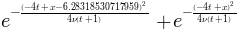

In [7]:
x, nu, t = sympy.symbols('x nu t')
phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + sympy.exp(-(x-4*t-2*numpy.pi)**2/(4*nu*(t+1)))
phi

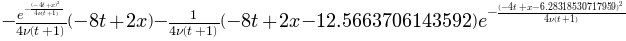

In [8]:
phiprime = phi.diff(x)
phiprime

In [9]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [10]:
from sympy.utilities.lambdify import lambdify

u = -2*nu*(phiprime/phi)+4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [11]:
u_lamb = lambdify((t, x, nu), u)
print("The value of u at t=1, x=4, nu=3 is {}.".format(u_lamb(1,4,3)))

The value of u at t=1, x=4, nu=3 is 3.4917066420644494.


In [12]:
### Variable declarations
nx = 101
nt = 100
dx = 2*numpy.pi/(nx-1)
nu = .07
sigma = .1
dt = sigma*dx**2/nu

x = numpy.linspace(0, 2*numpy.pi, nx)
un = numpy.empty(nx)
t = 0

In [13]:
u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

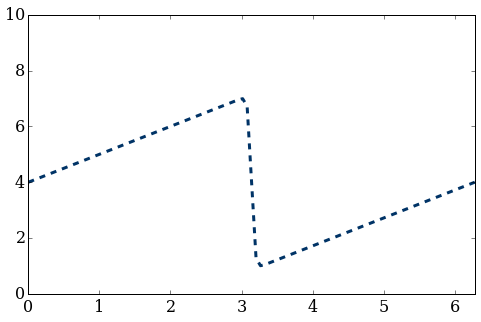

In [14]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u, color='#003366', ls='--', lw=3)
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10]);

In [15]:
for n in range(nt):
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) + nu*dt/dx**2*(un[2:] - 2*un[1:-1] + un[:-2])
    
    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*(un[1] - 2*un[0] + un[-1])
    
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*(un[0] - 2*un[-1] + un[-2])
    
    u_analytical = numpy.asarray([u_lamb(nt*dt, xi, nu) for xi in x])

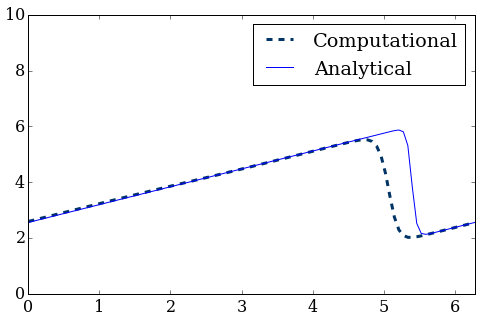

In [18]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x, u, color='#003366', ls='--', lw=3, label = 'Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10])
pyplot.legend();

In [19]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation

In [20]:
u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])

/Users/Michael/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in double_scalars
/Users/Michael/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:11: RuntimeWarning: overflow encountered in multiply
/Users/Michael/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in subtract
/Users/Michael/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in double_scalars
/Users/Michael/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in double_scalars
/Users/Michael/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in add



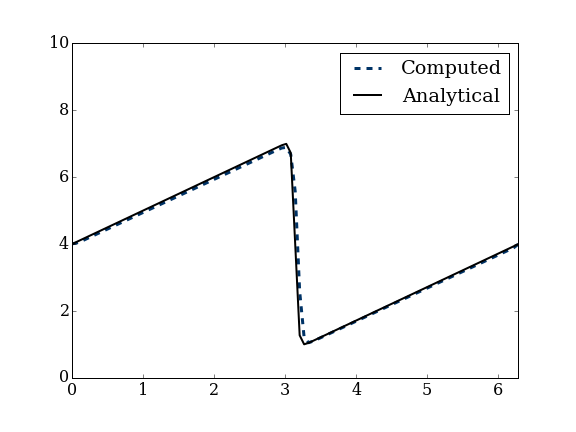
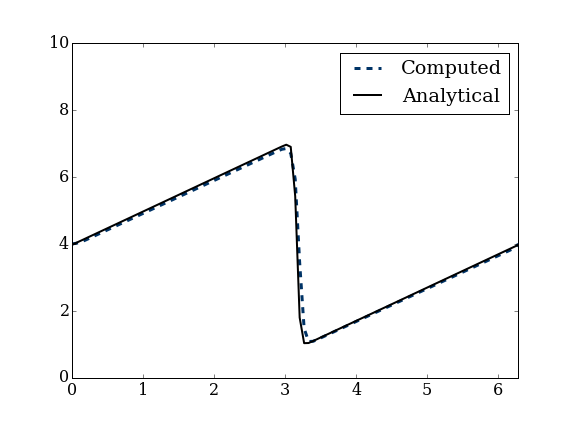
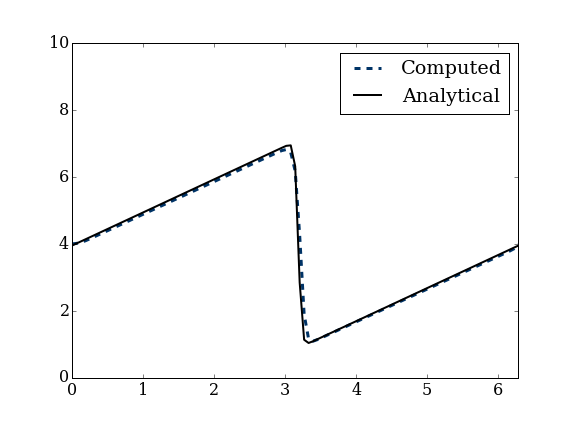
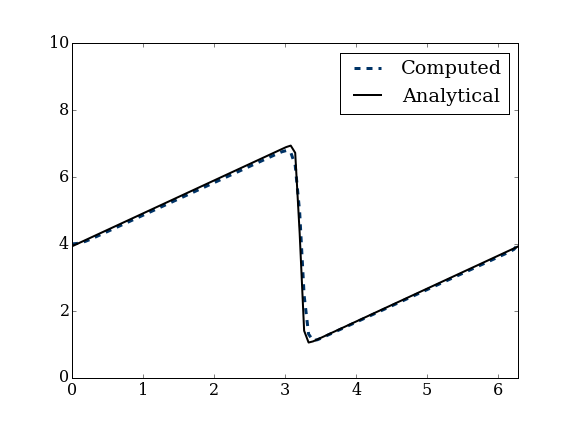
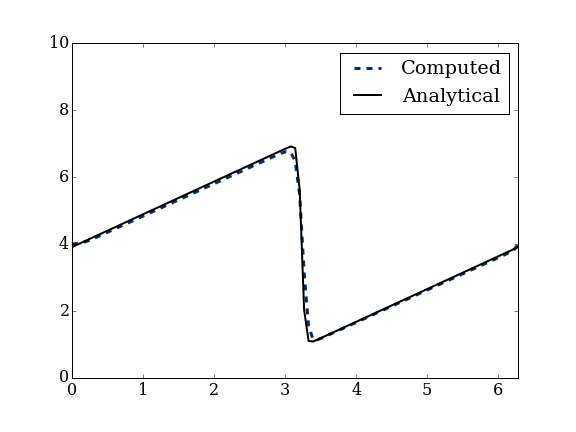
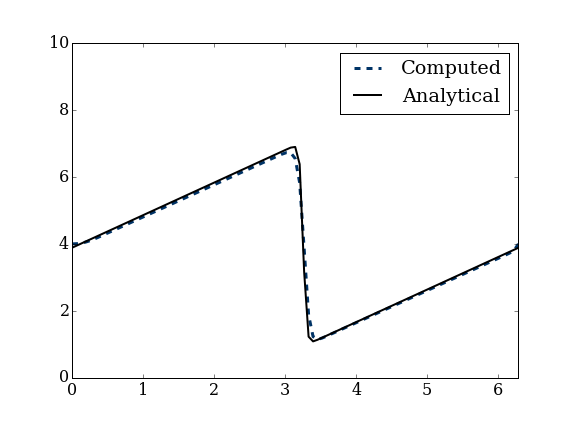
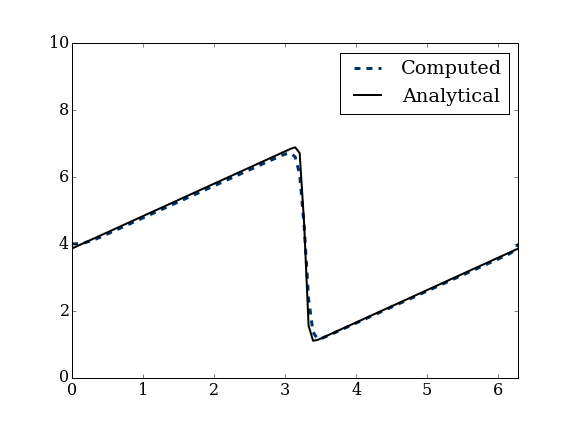
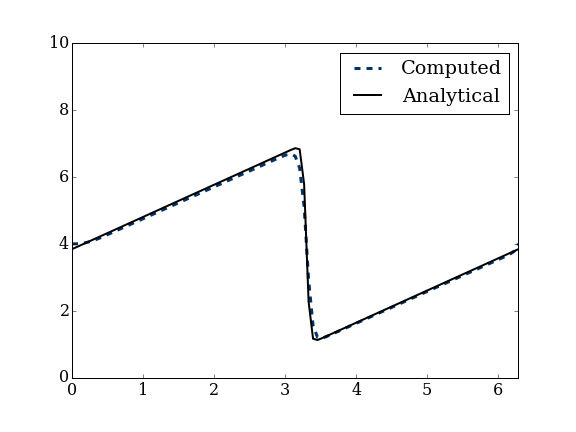
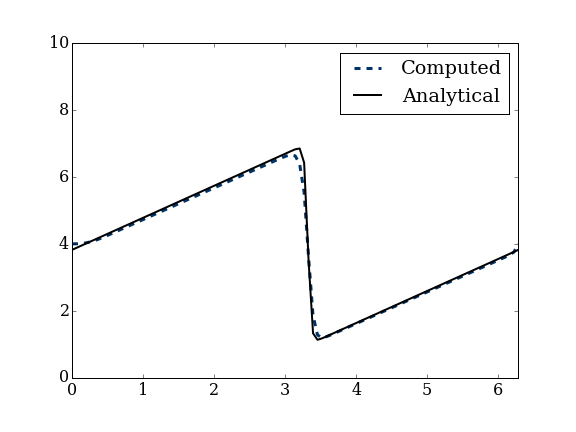
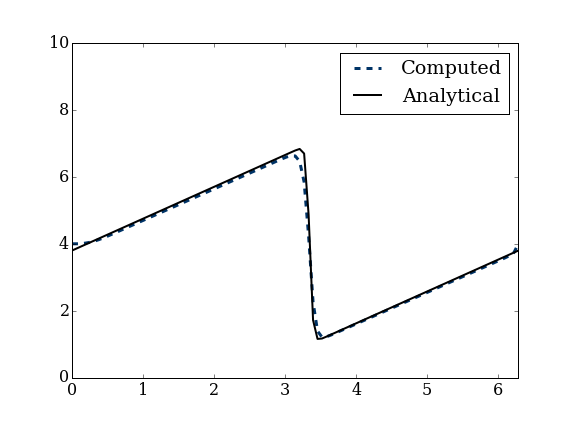
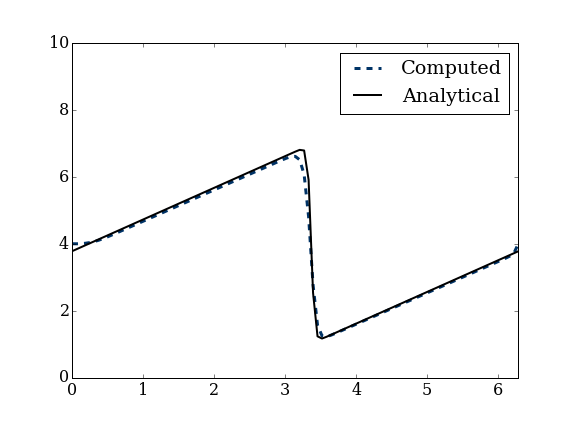
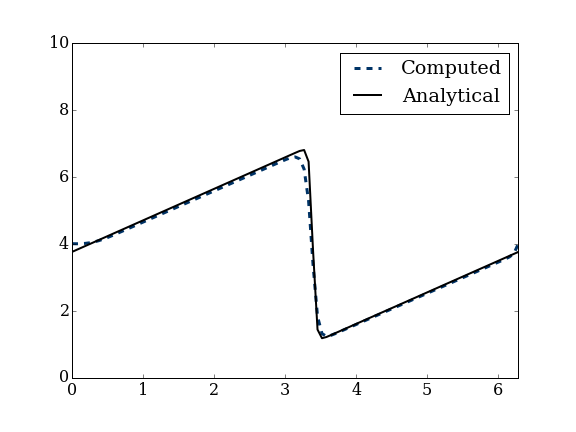
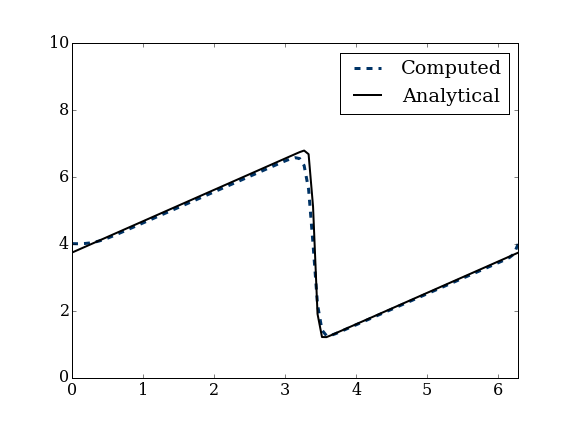
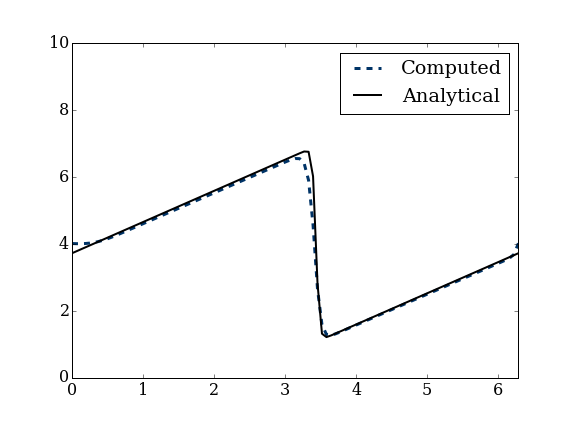
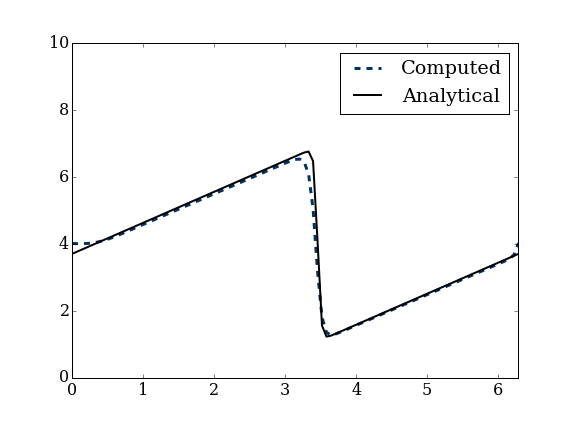
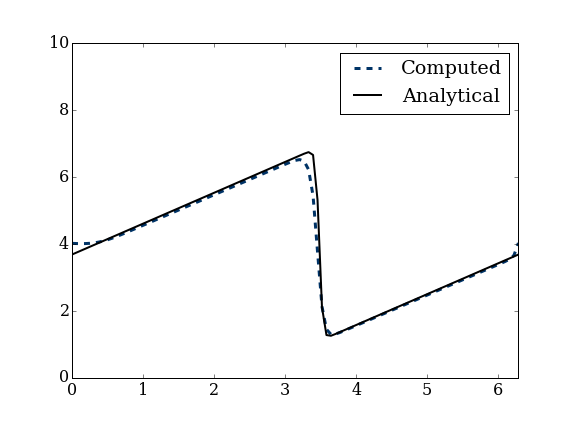
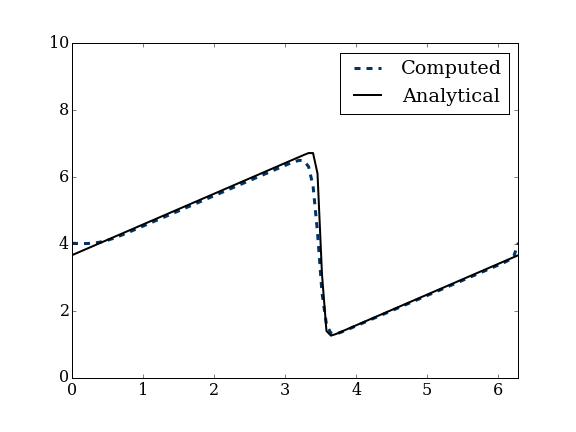
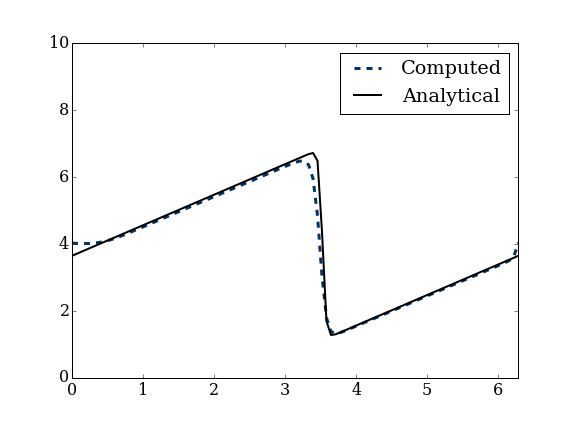
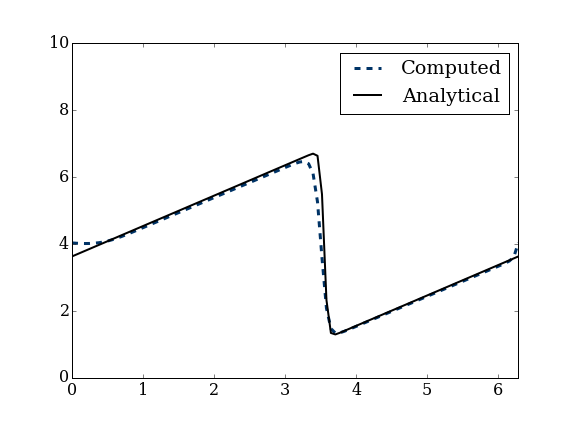
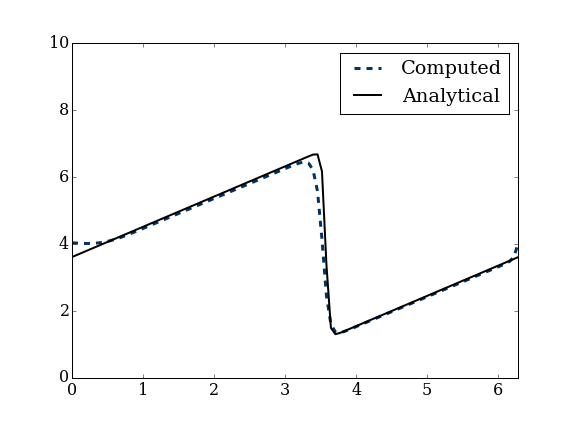
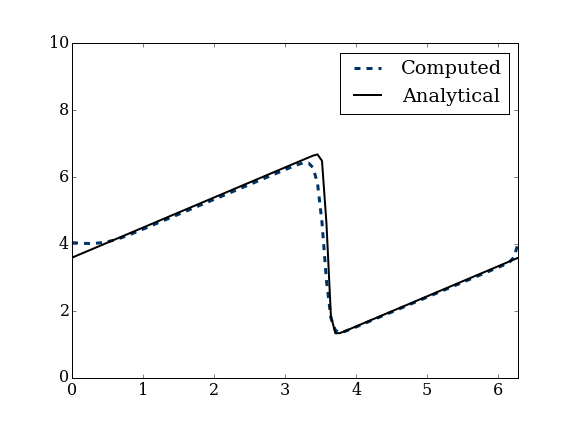
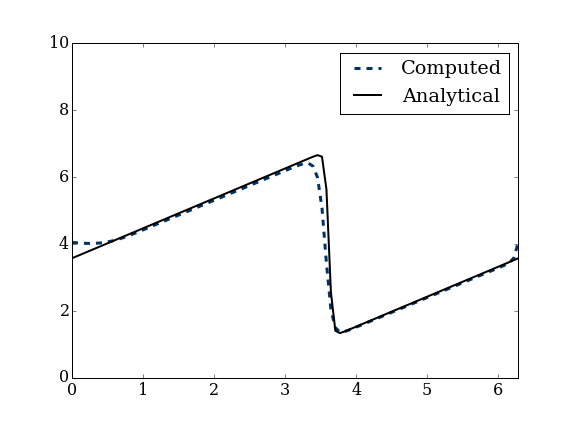
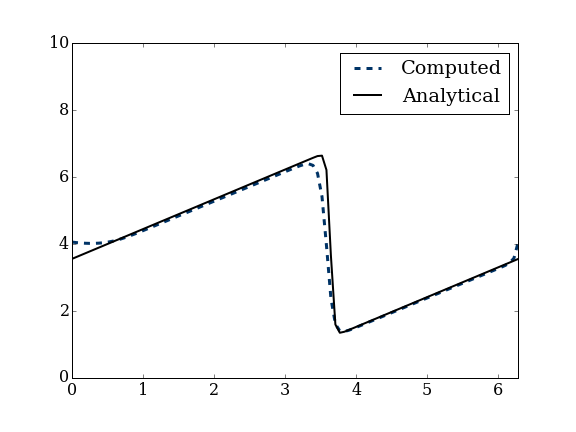
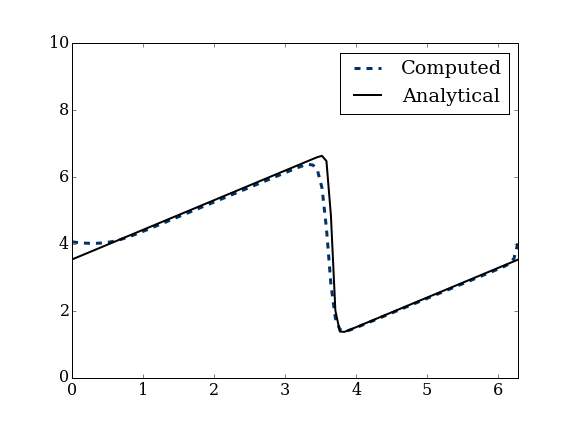
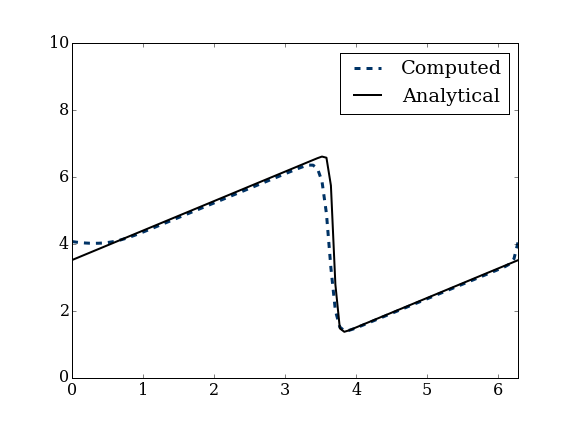
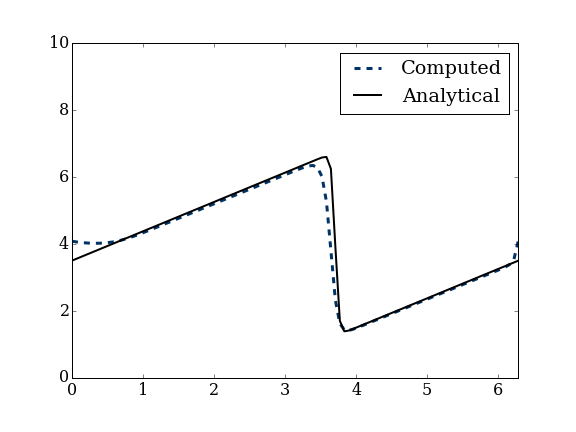
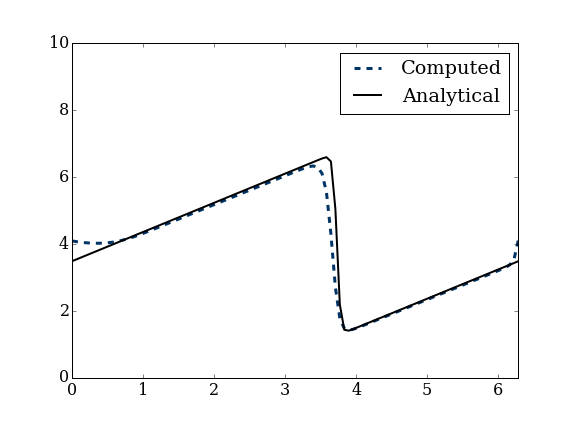
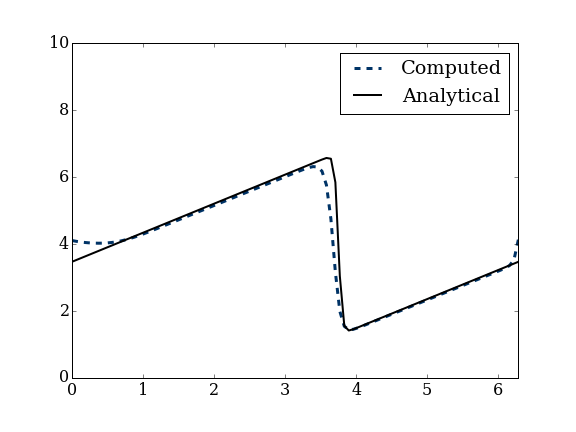
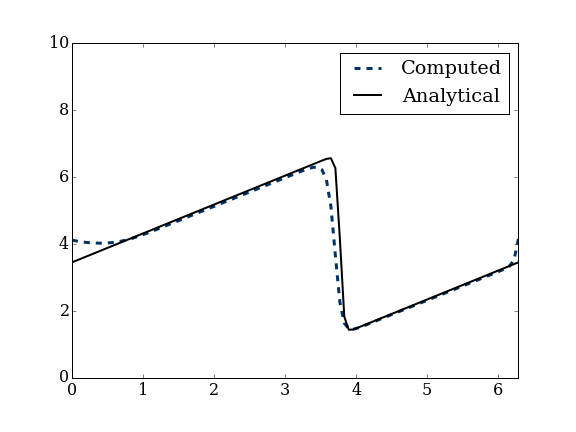
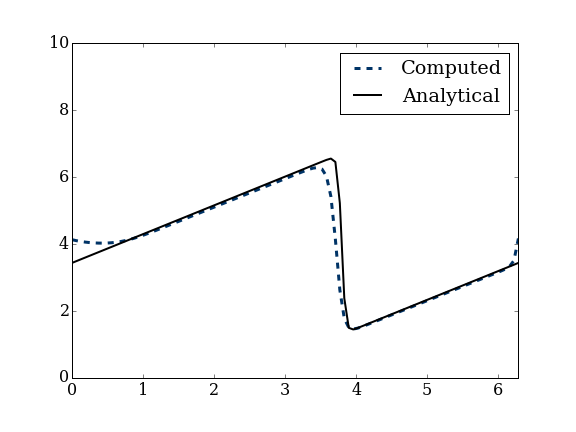
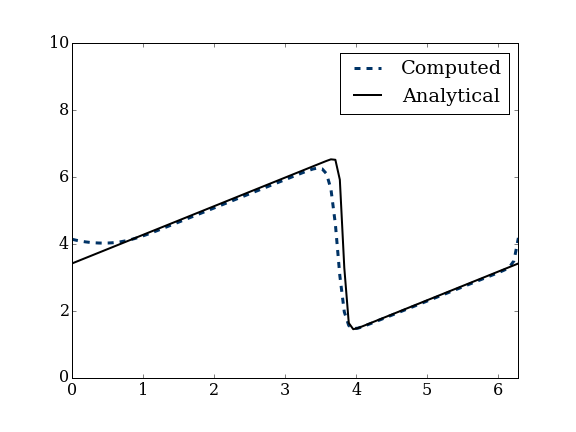
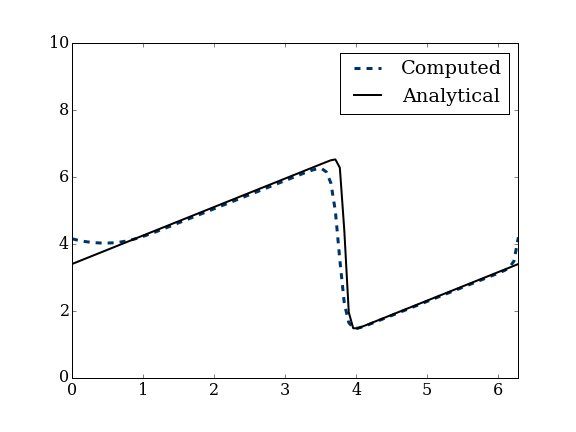
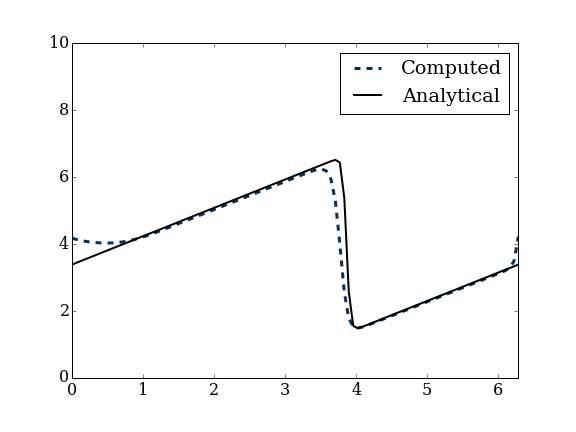
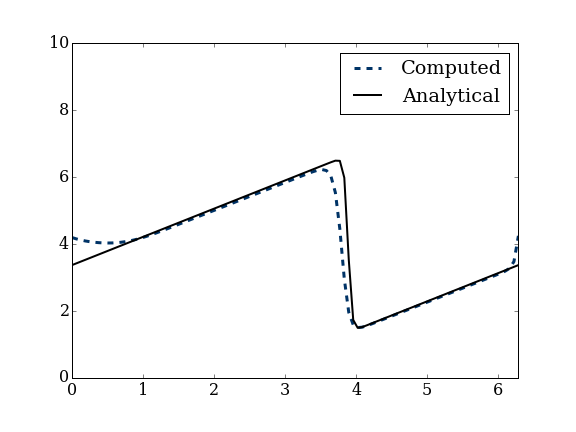
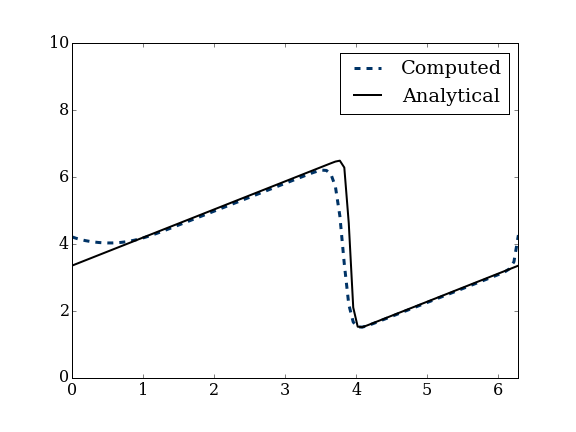
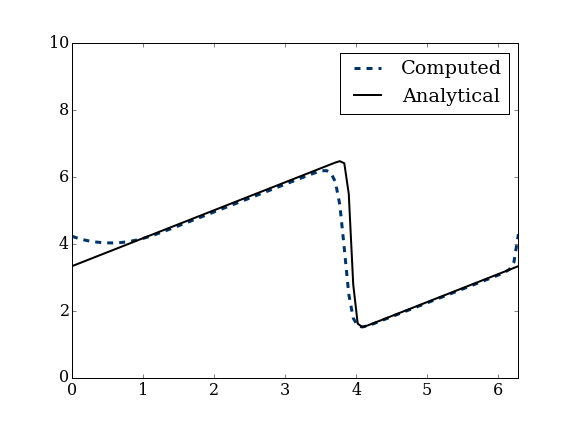
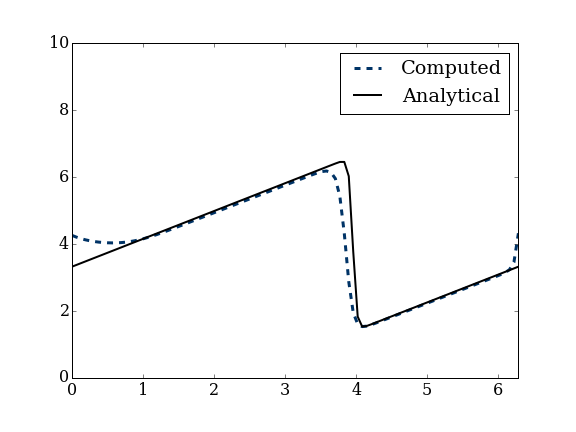
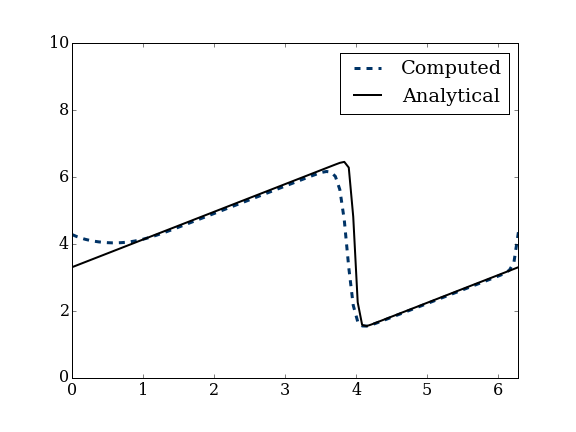
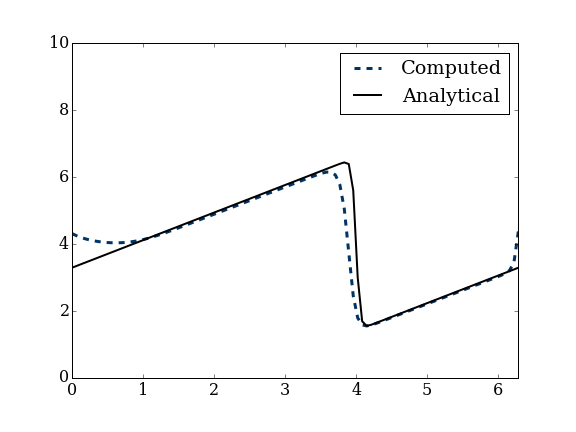
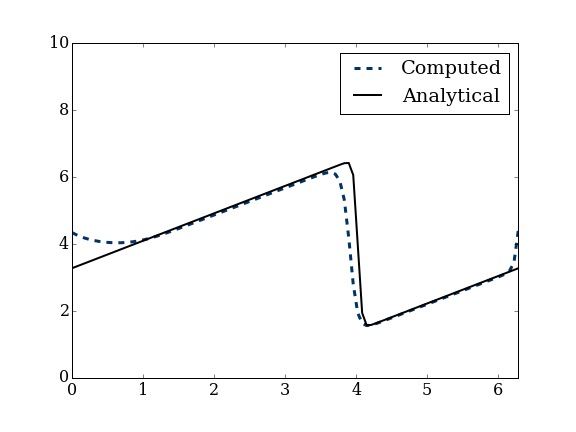
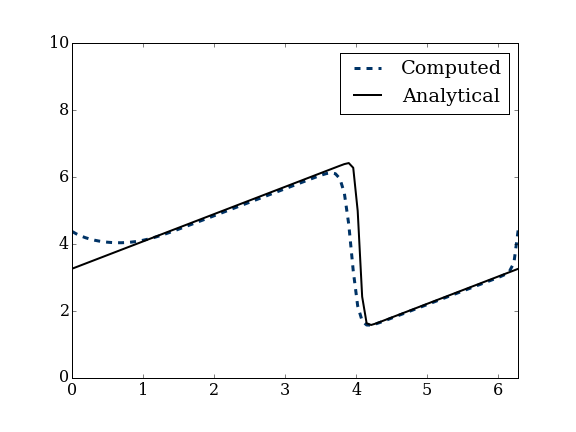
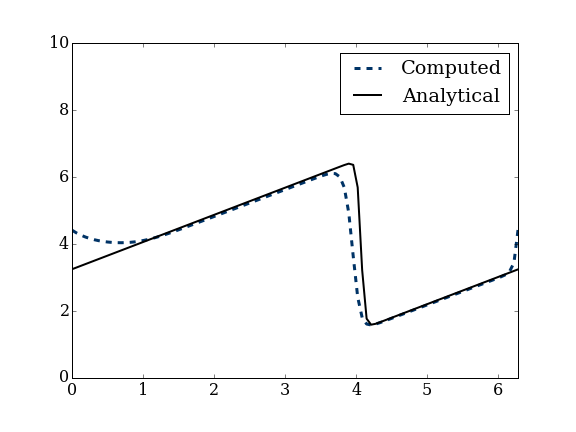
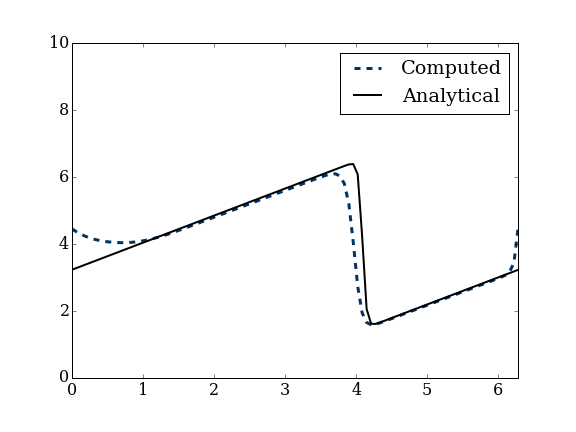
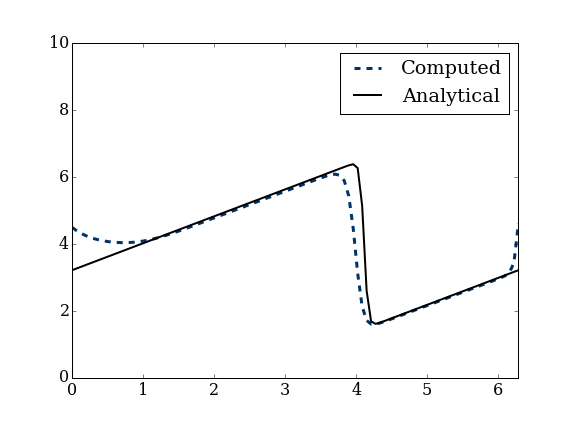
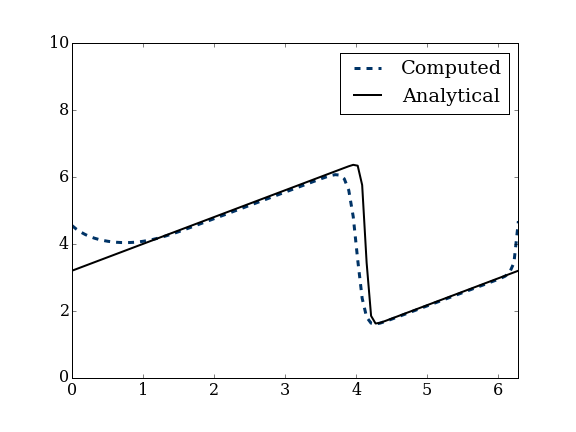
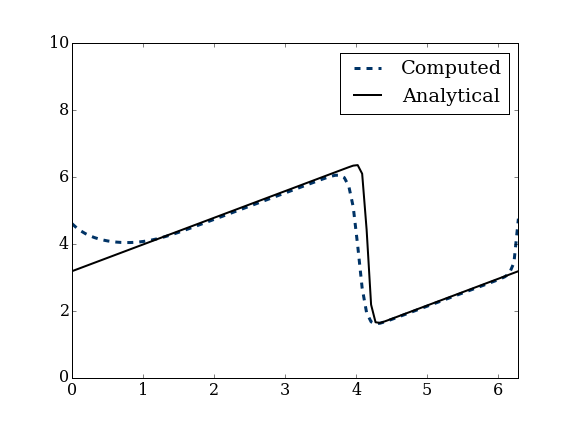
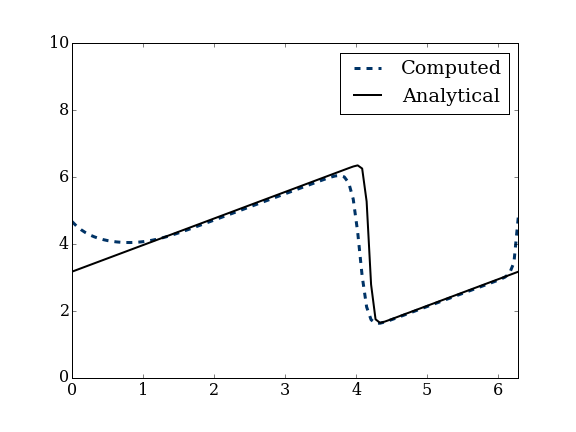
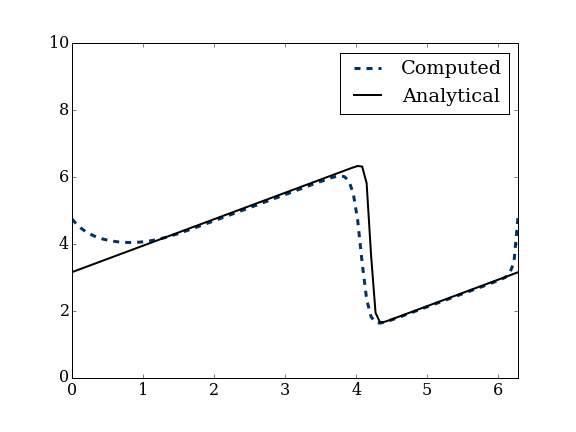
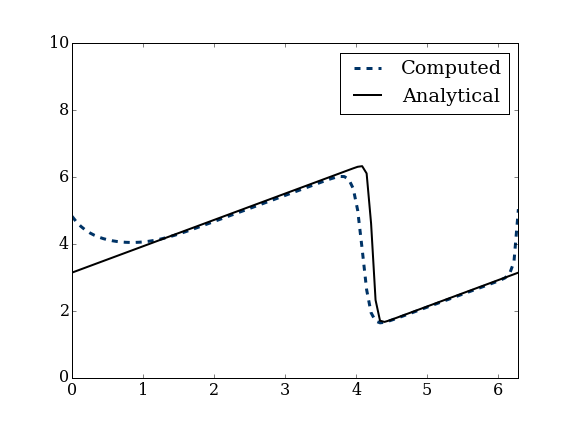
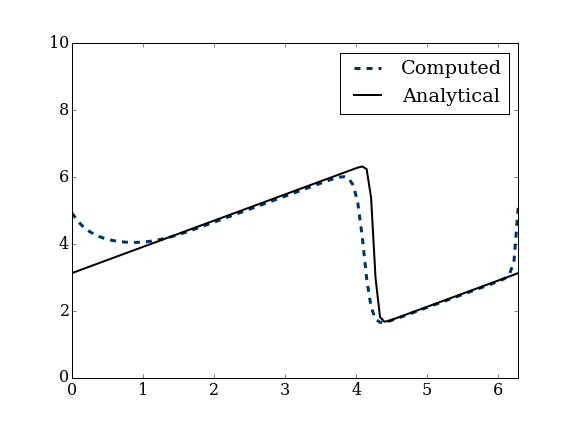
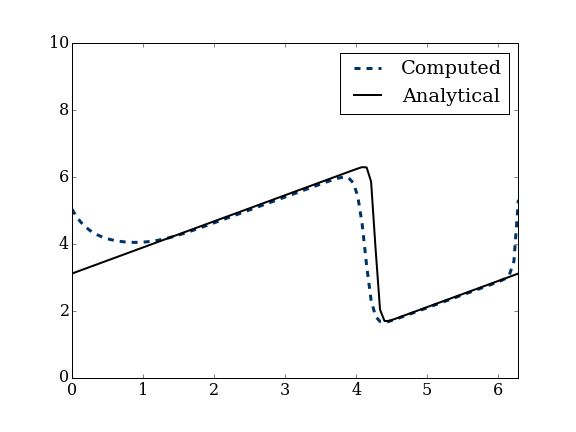
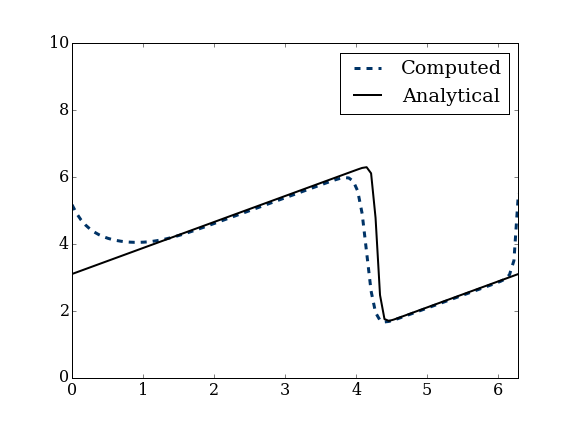
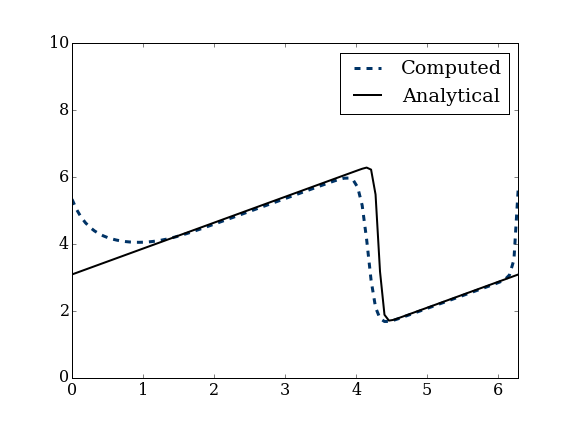
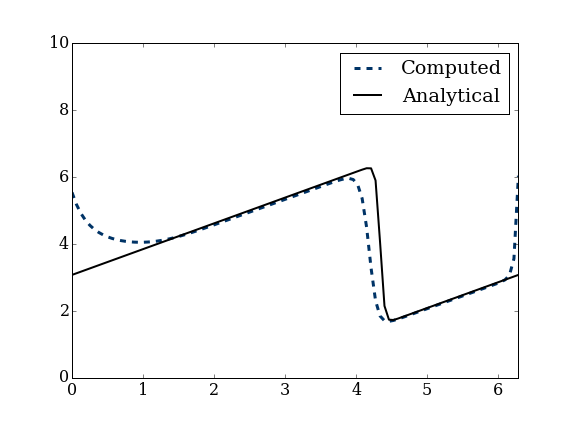
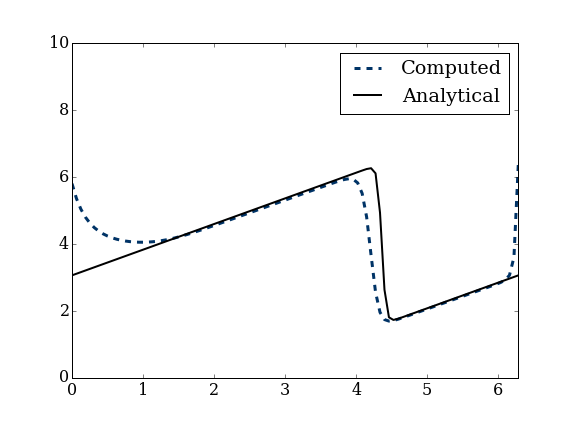
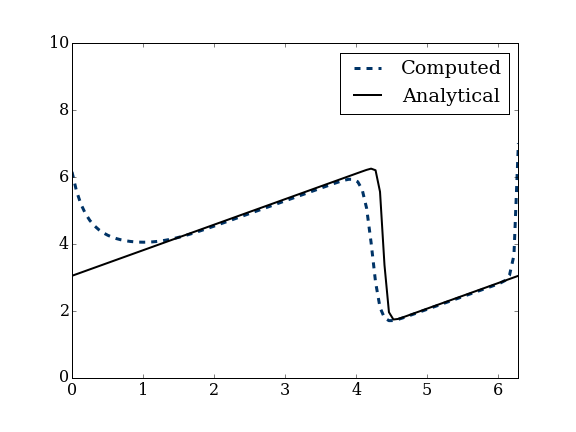
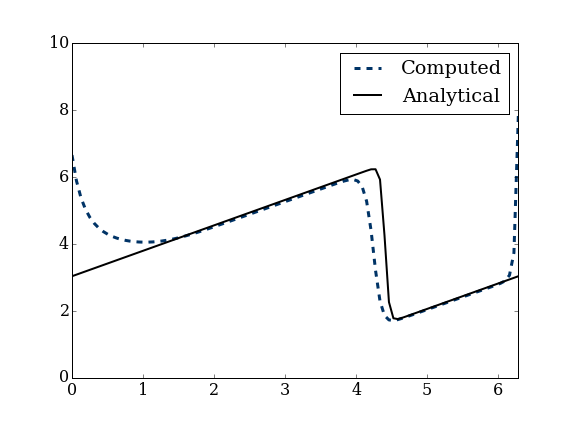
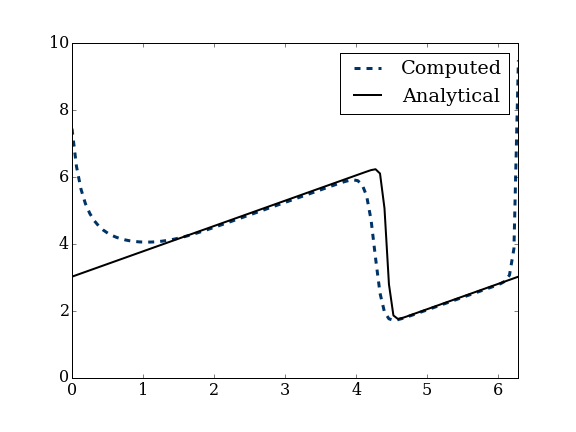
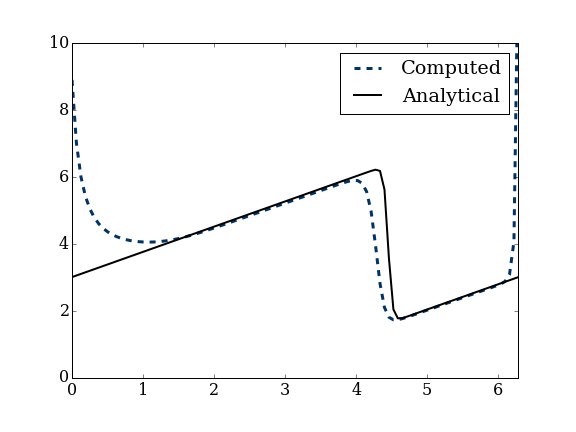
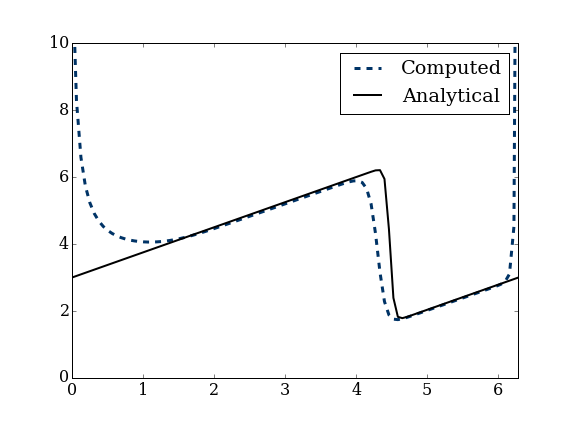
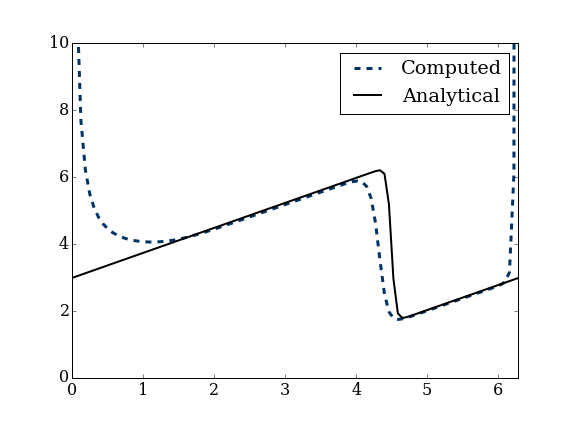
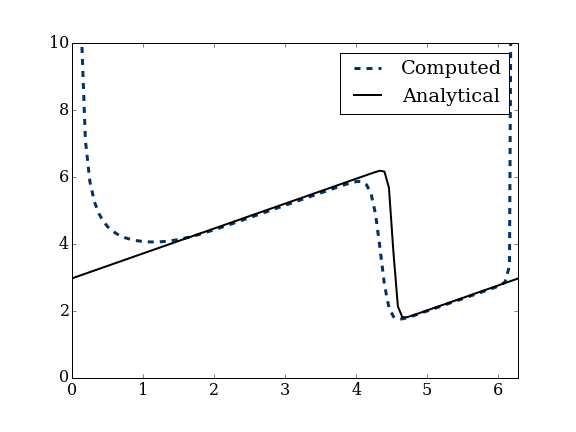
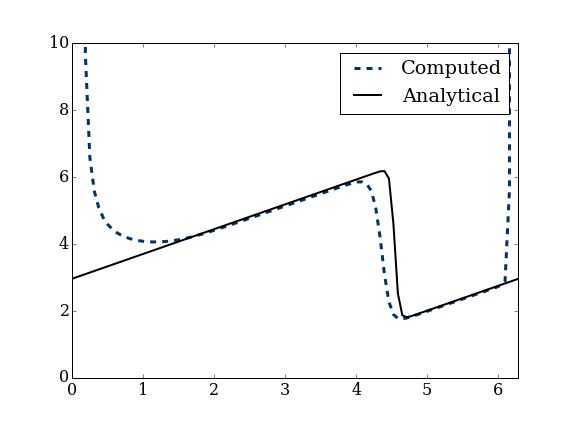
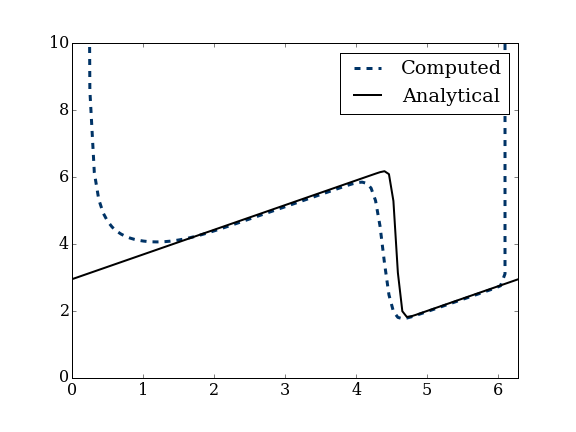
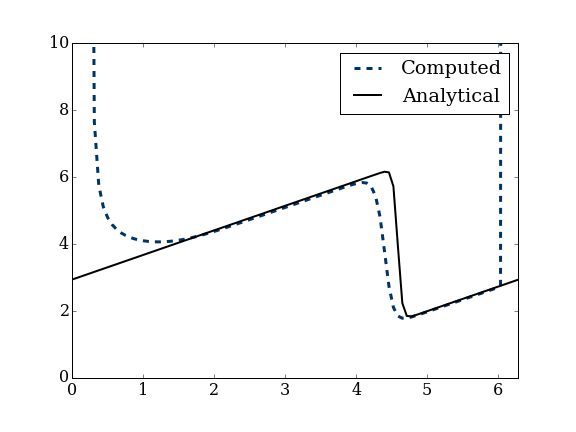
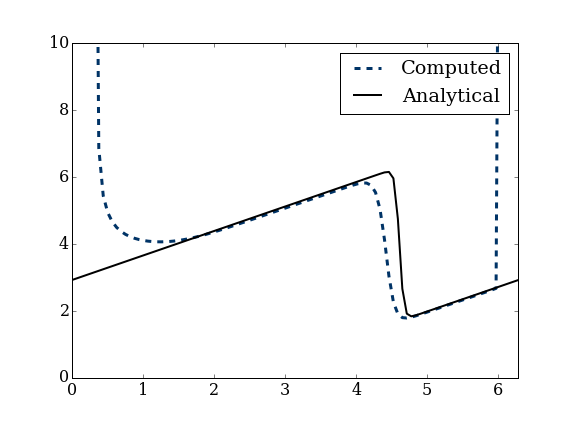
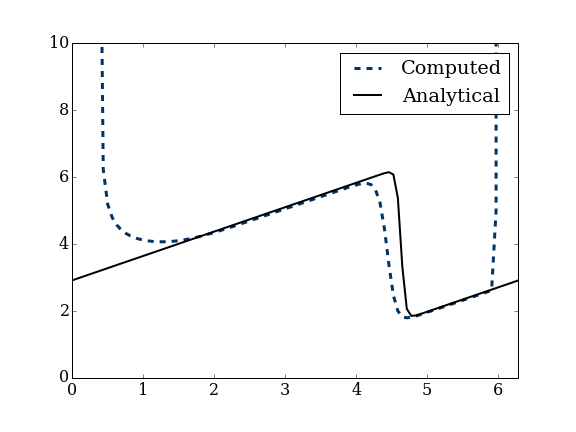
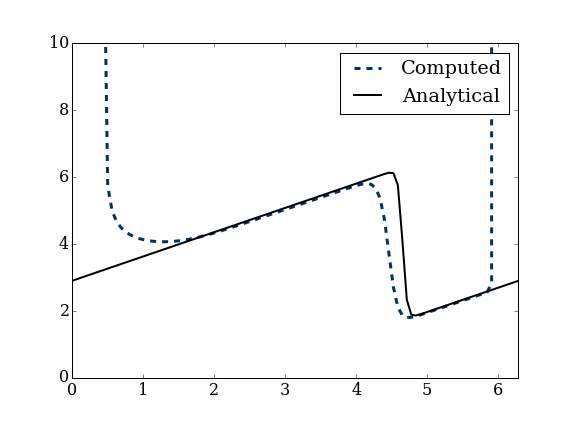
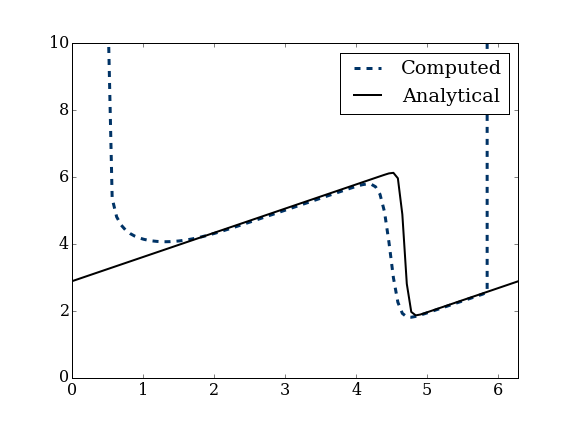
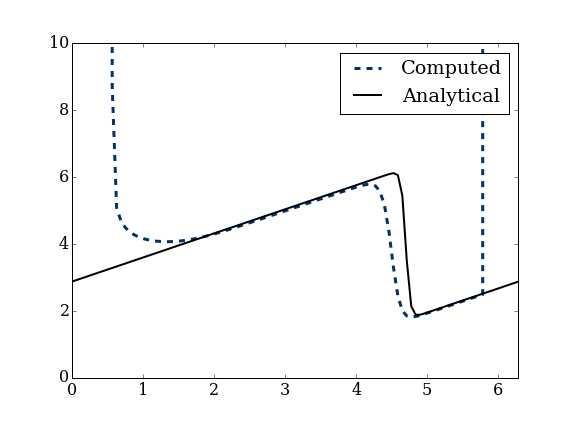
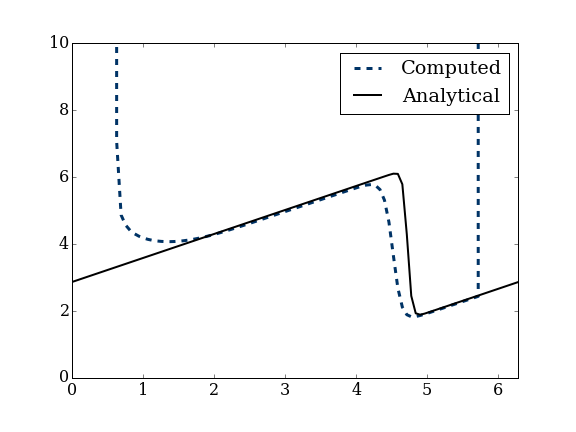
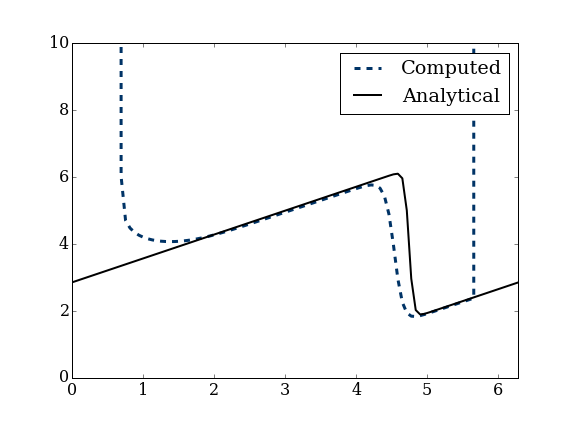
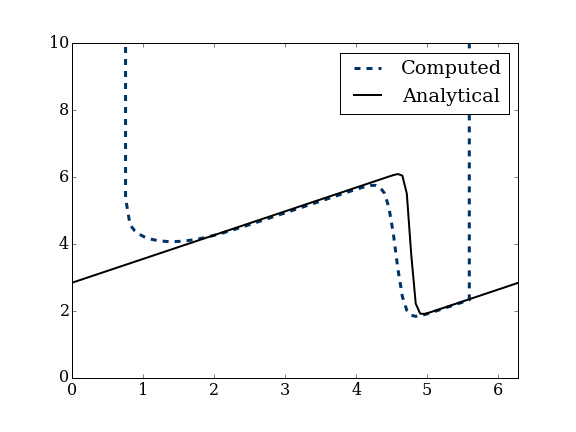
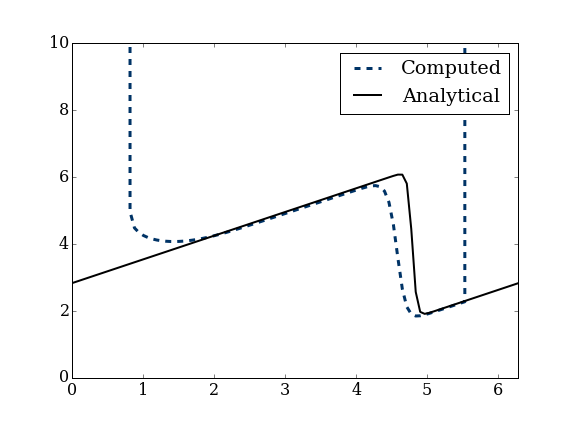
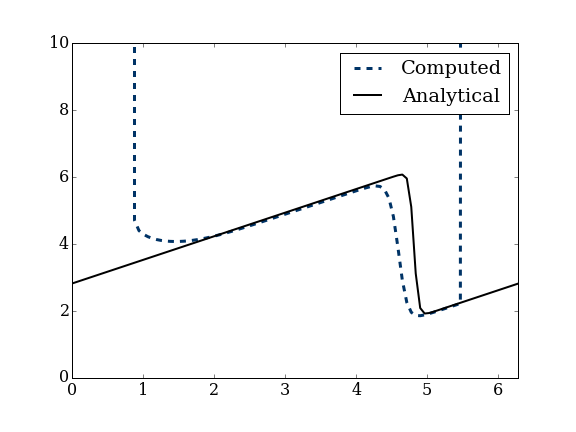
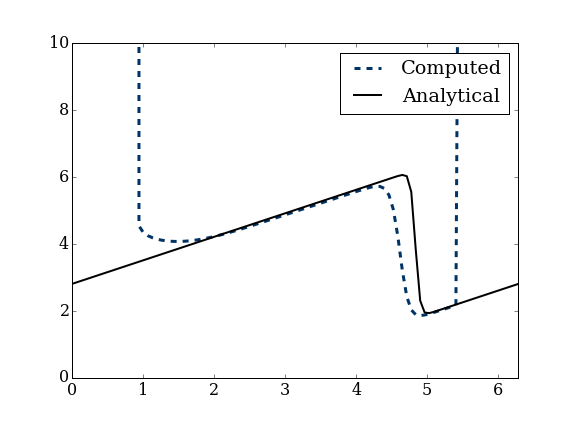
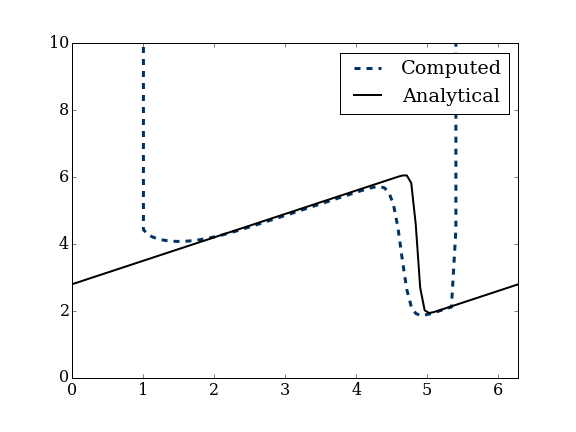
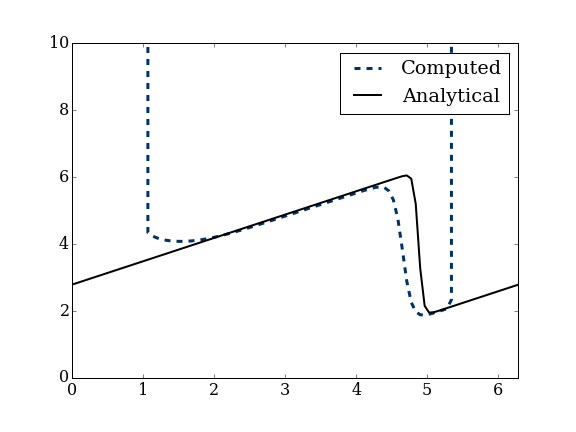
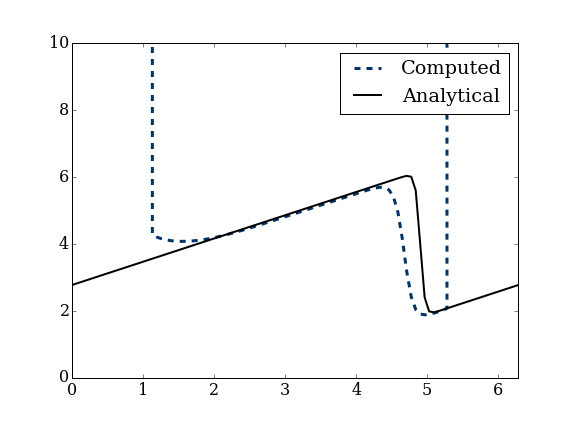
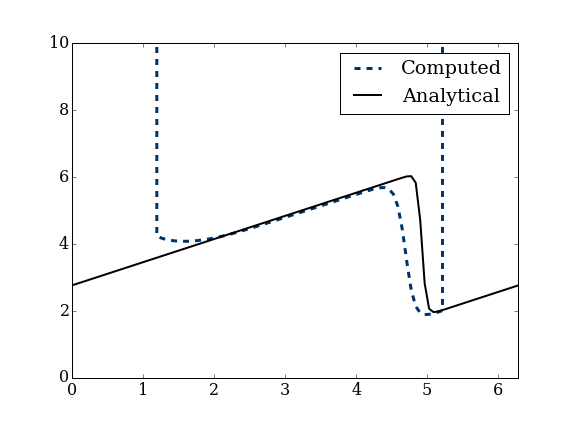
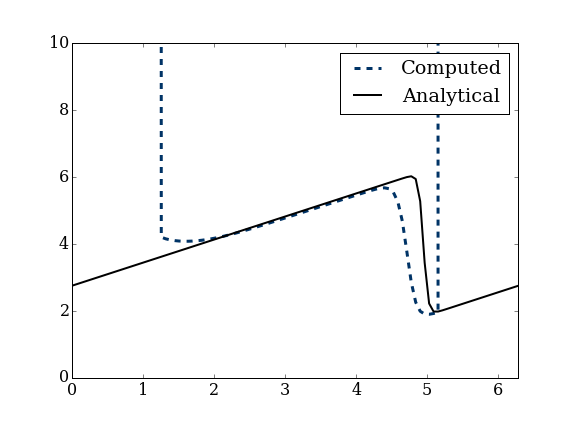
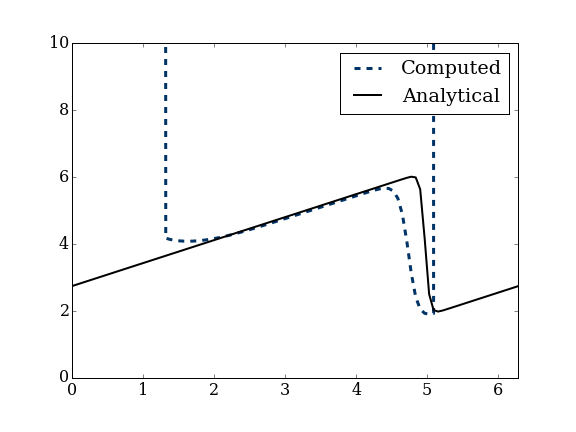
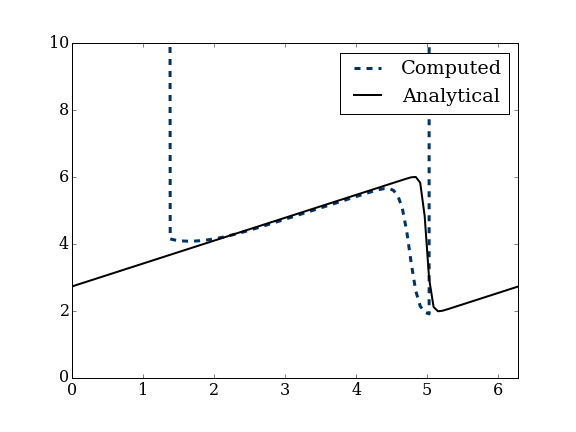
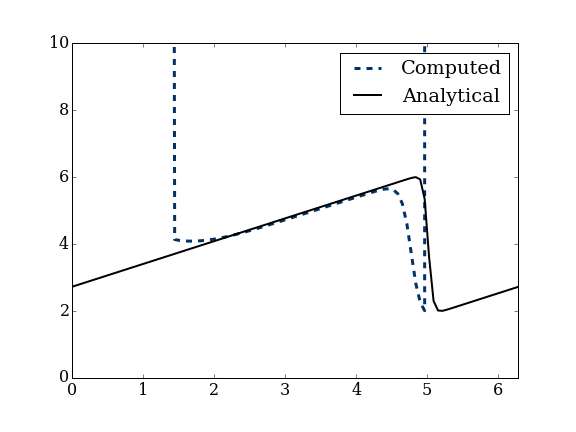
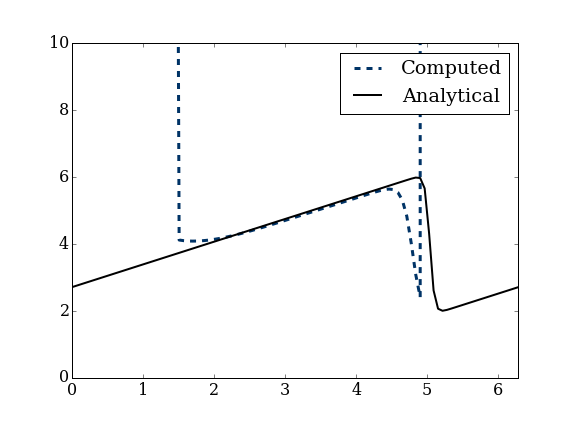
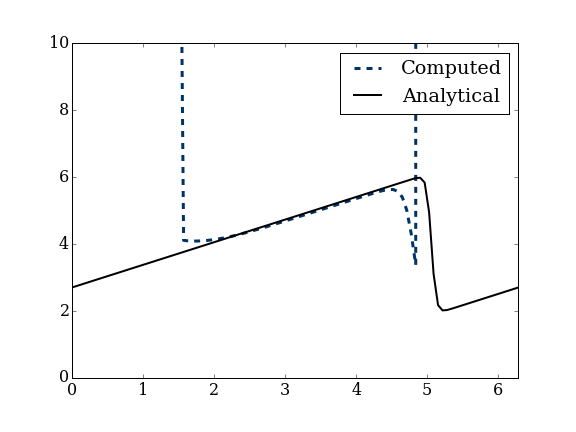
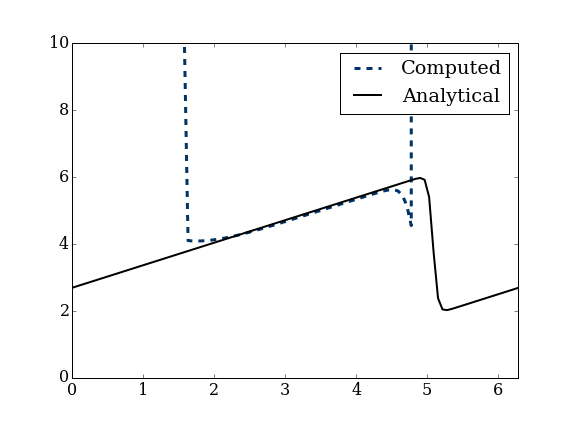
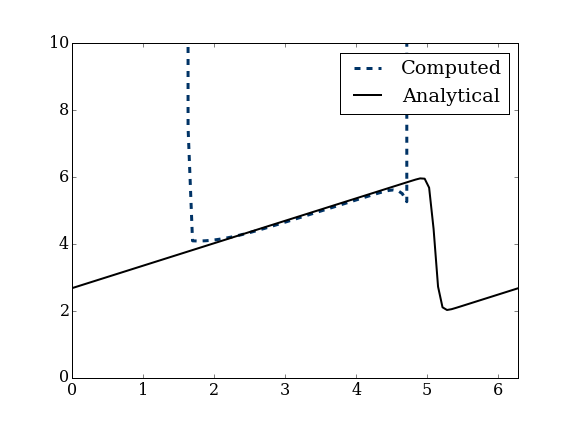
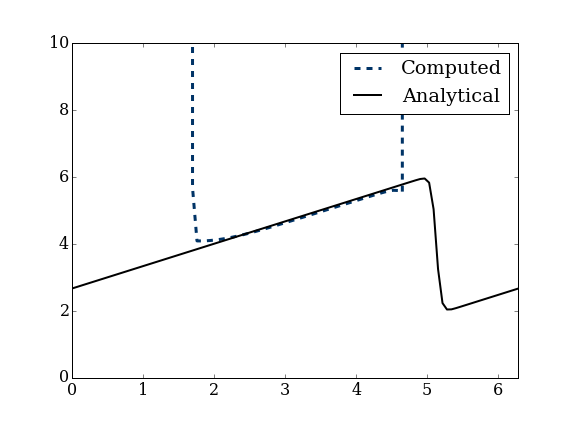
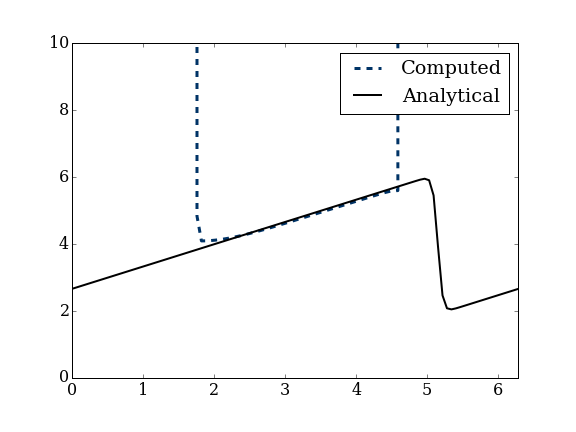
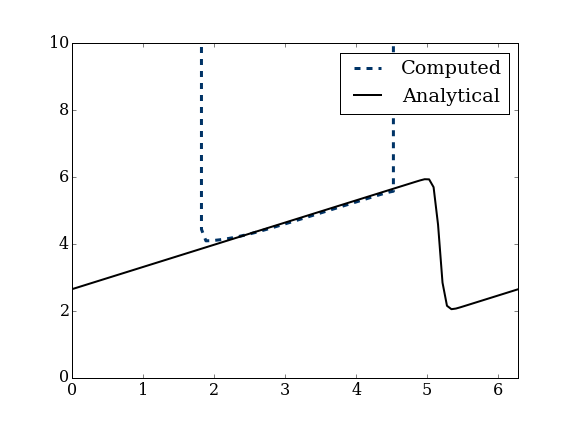
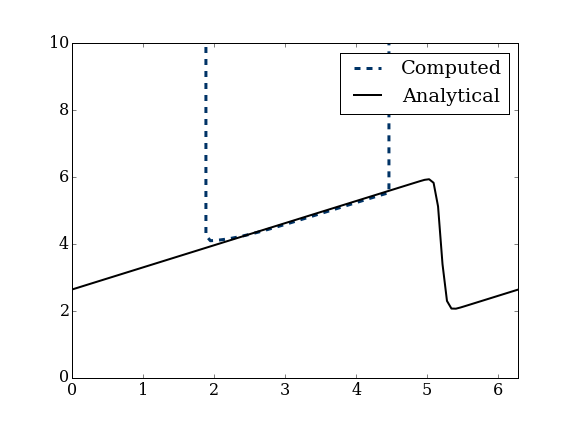
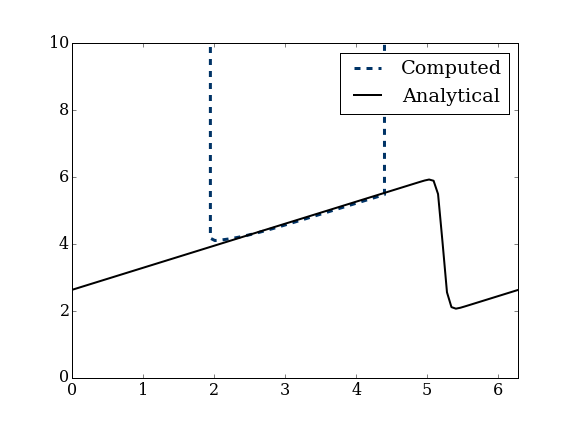
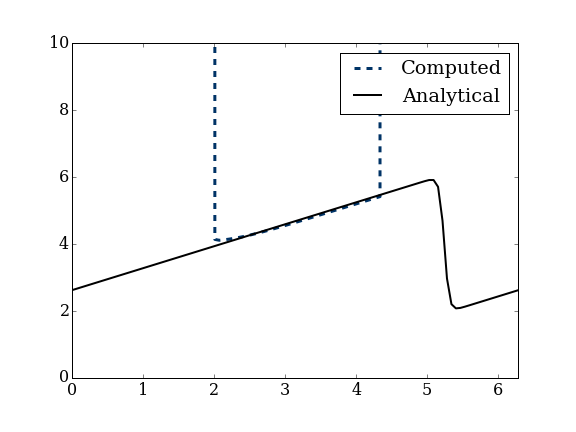
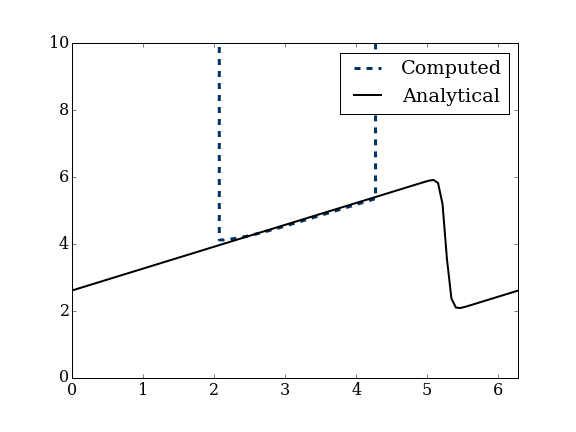
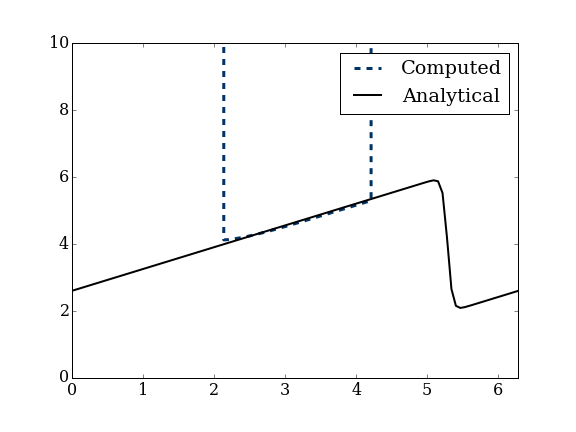
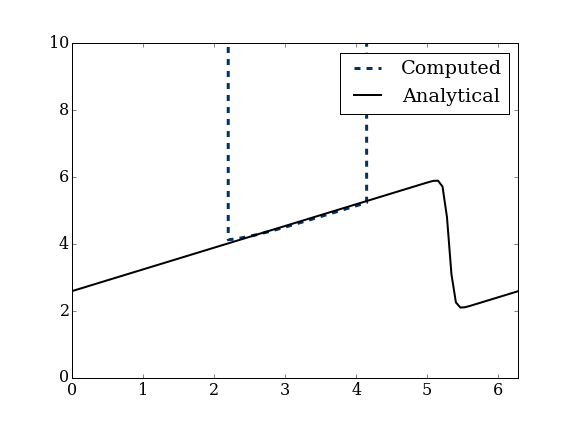
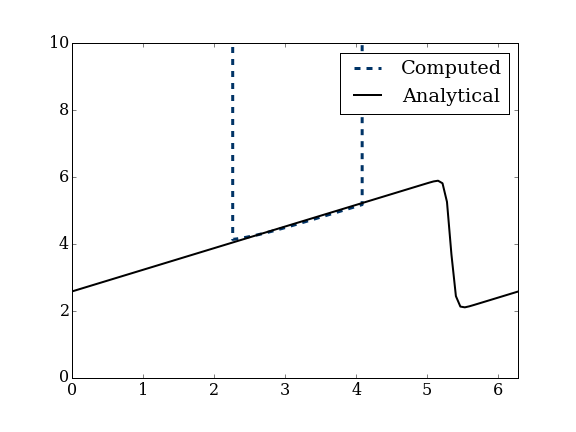
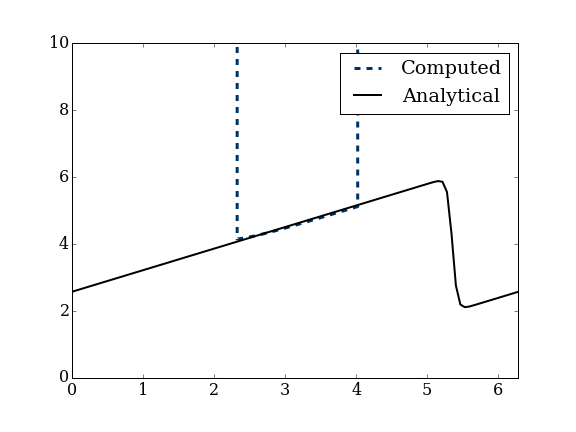
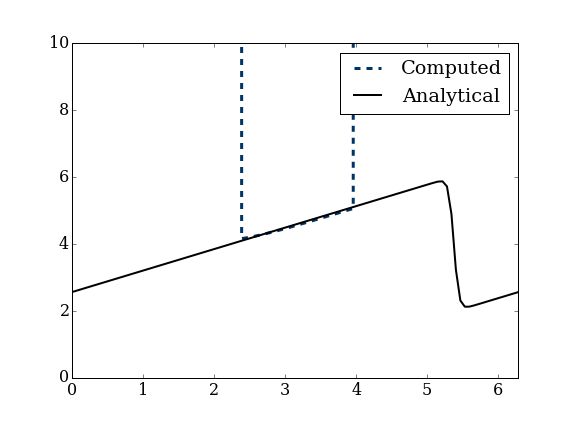

In [21]:
fig = pyplot.figure(figsize=(8,6))
ax = pyplot.axes(xlim=(0,2*numpy.pi), ylim=(0,10))
line = ax.plot([],[],color='#003366',ls='--',lw=3)[0]
line2 = ax.plot([],[], 'k-', lw=2)[0]
ax.legend(['Computed','Analytical'])

def burgers(n):
    
    un = u.copy()
    
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2]) +nu*dt/dx**2*(un[2:] - 2*un[1:-1] + un[:-2])
    
    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*(un[1] - 2*un[0] + un[-1])
    
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) * nu*dt/dx**2*(un[0] - 2*un[-1] + un[-2])
    
    u_analytical = numpy.asarray([u_lamb(n*dt, xi, nu) for xi in x])
    line.set_data(x,u)
    line2.set_data(x, u_analytical)
    
animation.FuncAnimation(fig, burgers, frames=nt, interval=100)